# Time Series Decomposition & Analysis Assignment

In [0]:
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
from ipywidgets import interact
import seaborn as sns
sns.set()

In [0]:
# linechart
def ilinechart(df,x,y,groups=None, title=''):
    fig = px.line(df,x=x,y=y, color=groups, title=title, template='none').update(layout=dict(title=dict(x=0.5)))
    
    # for item in range(len(fig.data)):
    #     fig.data[item].update(name=fig.data[item]['name'].split('=')[1])
    
    fig.show();

### Import the monthly sunspots data set into a Pandas dataframe, and convert the Month field to a datetime data type.

In [0]:
df=pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%203/monthly-sunspots.csv')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
Month       2820 non-null object
Sunspots    2820 non-null float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


### Use a line chart to plot the time series.

In [0]:
px.line(df, x='Month',y='Sunspots')

### Decompose the time series and add columns for the trend, seasonality, and residuals to the data set.

In [0]:
# copied from lecture (change to df)
series = df.set_index('Month')
decomposition = sm.tsa.seasonal_decompose(series, model='additive', freq=12)
trend = decomposition.trend
trend = trend[trend['Sunspots'].isna()==False].reset_index()
seasonality = decomposition.seasonal.reset_index()
residuals = decomposition.resid.reset_index()

In [0]:
type(series)

pandas.core.frame.DataFrame

In [0]:
series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2820 entries, 1749-01 to 1983-12
Data columns (total 1 columns):
Sunspots    2820 non-null float64
dtypes: float64(1)
memory usage: 44.1+ KB


In [0]:
df['Month'] = pd.to_datetime(df['Month'])

In [0]:
# copied from lecture (change to df)
df.set_index('Month', inplace=True)
decomposition = sm.tsa.seasonal_decompose(df['Sunspots'], model='additive', freq=12)
df['Trend']= decomposition.trend
# trend = df[df['Trend'].isna()==False].reset_index()
df['Seasonality'] = decomposition.seasonal
df['Residuals'] = decomposition.resid

In [0]:
df.reset_index(inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 5 columns):
Month          2820 non-null datetime64[ns]
Sunspots       2820 non-null float64
Trend          2808 non-null float64
Seasonality    2820 non-null float64
Residuals      2808 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 110.3 KB


In [0]:
df.tail()

,Month,Sunspots,Trend,Seasonality,Residuals
2815,1983-08-01,71.8,NaN,0.756047,NaN
2816,1983-09-01,50.3,NaN,1.068137,NaN
2817,1983-10-01,55.8,NaN,0.622001,NaN
2818,1983-11-01,33.3,NaN,-0.517030,NaN
2819,1983-12-01,33.4,NaN,0.355156,NaN


### Plot the observed values, trend, seasonality, and residuals on a multi-line chart. You should have a line for each column.

**Hint:** You may need to melt the data so that all the categories are in a single column and all the values are in a single column.

In [0]:
melted = pd.melt(df,id_vars='Month', value_vars=['Sunspots','Trend','Seasonality','Residuals'], var_name='Variable',value_name='Value')

In [0]:
melted.head()

,Month,Variable,Value
0,1749-01-01,Sunspots,58.0
1,1749-02-01,Sunspots,62.6
2,1749-03-01,Sunspots,70.0
3,1749-04-01,Sunspots,55.7
4,1749-05-01,Sunspots,85.0


In [0]:
px.line(trend, 'Month','Sunspots', title='Trend')

In [0]:
px.line(seasonality, 'Month','Sunspots', title = 'Seasonality')

In [0]:
px.line(residuals, 'Month','Sunspots', title = 'Residuals')

In [0]:
df.head()

,Month,Sunspots,Trend,Seasonality,Residuals
0,1749-01-01,58.0,NaN,-2.161902,NaN
1,1749-02-01,62.6,NaN,-0.108501,NaN
2,1749-03-01,70.0,NaN,-1.275435,NaN
3,1749-04-01,55.7,NaN,-0.240018,NaN
4,1749-05-01,85.0,NaN,1.142211,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 5 columns):
Month          2820 non-null datetime64[ns]
Sunspots       2820 non-null float64
Trend          2808 non-null float64
Seasonality    2820 non-null float64
Residuals      2808 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 110.3 KB


In [0]:
melted.head()

,Month,Variable,Value
0,1749-01-01,Sunspots,58.0
1,1749-02-01,Sunspots,62.6
2,1749-03-01,Sunspots,70.0
3,1749-04-01,Sunspots,55.7
4,1749-05-01,Sunspots,85.0


In [0]:
ilinechart(melted, 'Month','Value', groups='Variable', title='Sunspots')
# ilinechart(seasonality, 'Month','Sunspots', title = 'Seasonality')
# ilinechart(residuals, 'Month','Sunspots', title = 'Residuals')

### Add two columns to the data set - one that calculates a rolling mean and another that calculates a rolling standard deviation.

In [0]:
df['Rolling_Mean'] = df['Sunspots'].rolling(window=12).mean()
df['Rolling_Std'] = df['Sunspots'].rolling(window=12).std()
rolling = pd.melt(df,id_vars='Month', value_vars=['Sunspots','Rolling_Mean','Rolling_Std'], var_name='Variable',value_name='Value')
ilinechart(rolling, 'Month', 'Value', groups='Variable', title='Rolling Mean & Standard Deviations')

### Plot the rolling mean and standard deviation on a multi-line chart along with the observed values.

### Perform an Augmented Dickey Fuller Test on the data set and determine whether this time series is stationary.

In [0]:
adf_test = sm.tsa.stattools.adfuller(df['Sunspots'])
results = pd.Series(adf_test[0:4], index=['ADF Test Statistic', 'P-Value','# Lags Used', '# Observations Used'])

for key, value in adf_test[4].items():
    results['Critical Value (%s)'%key]=value

print('Augmented Dickey-Fuller Test Results: \n')
print(results)

Augmented Dickey-Fuller Test Results: 

ADF Test Statistic     -9.567668e+00
P-Value                 2.333452e-16
# Lags Used             2.700000e+01
# Observations Used     2.792000e+03
Critical Value (1%)    -3.432694e+00
Critical Value (5%)    -2.862576e+00
Critical Value (10%)   -2.567321e+00
dtype: float64


### Generate an autocorrelation plot for the data set to determine the level of autocorrelation in this time series.

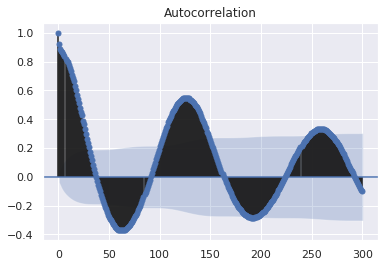

In [101]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plot_acf(df['Sunspots'], lags=300)